|||
|---|---|
|Title|nwreadinglistmanager|
|Author|numbworks|
|Version|1.5.0|
||Please check [docs/docs-nwreadinglistmanager.md](../docs/docs-nwreadinglistmanager.md) before proceeding.|

#### Setup

In [552]:
install_dependencies : bool = False

if install_dependencies:
    %pip install pandas==1.5.2
    %pip install numpy==1.24.0
    %pip install openpyxl==3.0.10
    %pip install tabulate==0.9.0
    %pip install coverage==7.2.3


#### Global Modules

In [553]:
from datetime import datetime
from pandas import DataFrame


#### Local Modules

In [554]:
import nwreadinglistmanager as nwrlm
import nwcorecomponents as nwcc
from nwreadinglistmanager import SettingCollection

#### Functions : Temp

#### Settings

In [555]:
setting_collection : SettingCollection = SettingCollection(
    read_years = [2016, 2017 , 2018, 2019, 2020, 2021, 2022, 2023],
    excel_path = nwrlm.get_default_reading_list_path(),
    excel_books_skiprows = 0,
    excel_books_nrows = 255,
    excel_books_tabname = "Books",
    excel_null_value = "-",
    is_worth_min_books = 8,
    is_worth_min_avgrating = 2.50,
    n_generic = 5,
    n_by_month = 12,
    n_by_kbsize = 10,
    show_books_df = False,
    show_sas_by_month_upd_df = True,
    show_sas_by_year_street_price_df = True,
    show_cumulative_df = True,
    show_sas_by_topic_df = True,
    show_sas_by_publisher_df = False,
    show_sas_by_publisher_flt_df = True,
    show_sas_by_rating_df = True,
    last_update = datetime.now(),
    show_readme_md = True,
    show_reading_list_by_month_md = True,
    show_reading_list_by_publisher_md = True,
    show_reading_list_by_rating_md = True,
    show_reading_list_by_topic_md = True,
    show_reading_list_md = True,
    formatted_rating = True,
    now  = datetime.now(),
    working_folder_path = "c:/Users/Rubèn/Desktop/",
    readme_file_name  = "README.md",
    reading_list_by_month_file_name = "READINGLISTBYMONTH.md",
    reading_list_by_publisher_file_name = "READINGLISTBYPUBLISHER.md",
    reading_list_by_rating_file_name = "READINGLISTBYRATING.md",
    reading_list_by_topic_file_name = "READINGLISTBYTOPIC.md",
    reading_list_file_name = "READINGLIST.md",
    save_reading_lists_to_file = False,
    use_smaller_font_for_reading_list_md = True,
    use_smaller_font_for_reading_list_by_month_md = True,
    definitions = { 
        "KBSize": "The most valuable concepts of each book are noted into a knowledge base. This metric is the word count of those notes."
    }
)


#### Main : Analysis

In [556]:
books_df : DataFrame = nwrlm.get_books_dataset(setting_collection = setting_collection)

if setting_collection.show_books_df:
    display(books_df.head(n = setting_collection.n_generic))


In [557]:
sas_by_month_df : DataFrame = nwrlm.get_sas_by_month(books_df = books_df, read_years = setting_collection.read_years)
sas_by_month_upd_df = nwrlm.update_future_rs_to_empty(sas_by_month_df = sas_by_month_df , now = setting_collection.now)

if setting_collection.show_sas_by_month_upd_df:
    display(sas_by_month_upd_df.head(n = setting_collection.n_by_month))


,Month,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023
0,1,0 (0),↑,13 (5157),↓,0 (0),↑,4 (1061),↓,0 (0),=,0 (0),=,0 (0),=,0 (0)
1,2,0 (0),↑,1 (106),↓,0 (0),↑,13 (2991),↓,0 (0),↑,11 (1289),↓,0 (0),=,0 (0)
2,3,0 (0),↑,16 (3816),↓,6 (600),↑,20 (3349),↓,0 (0),↑,2 (612),↓,0 (0),↑,1 (139)
3,4,0 (0),↑,8 (2539),↓,7 (1986),↓,0 (0),↑,9 (2226),↓,0 (0),=,0 (0),=,0 (0)
4,5,1 (288),↑,13 (3527),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0)
5,6,8 (1734),↓,4 (788),↓,1 (24),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,8 (642)
6,7,4 (1758),↓,3 (1140),=,3 (427),↓,2 (444),↓,0 (0),=,0 (0),=,0 (0),=,0 (0)
7,8,2 (334),↓,1 (453),↓,0 (0),↑,2 (848),↓,0 (0),=,0 (0),=,0 (0),↑,4 (1170)
8,9,4 (881),↓,3 (840),↓,0 (0),↑,1 (1259),↓,0 (0),=,0 (0),↑,1 (360),↑,9 (1969)
9,10,2 (275),↓,0 (0),↑,6 (1201),↓,0 (0),↑,6 (1941),↓,0 (0),=,0 (0),,


In [558]:
sas_by_year_street_price_df : DataFrame = nwrlm.get_sas_by_year_street_price(
    sas_by_month_df = sas_by_month_df, 
    books_df = books_df, 
    read_years = setting_collection.read_years
    )

if setting_collection.show_sas_by_year_street_price_df:
    display(sas_by_year_street_price_df.head(n = setting_collection.n_generic))


,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023
0,43 (12322),↑,62 (18366),↓,48 (12646),↓,42 (9952),↓,23 (6602),↓,13 (1901),↓,1 (360),↑,22 (3920)
1,$1447.14,↑,$2093.14,↓,$1249.15,↓,$748.70,↓,$538.75,↓,$169.92,↓,$49.99,↑,$461.83


In [559]:
cumulative_df : DataFrame = nwrlm.get_cumulative(books_df = books_df, last_update = setting_collection.last_update)

if setting_collection.show_cumulative_df:
    display(cumulative_df.head(n = setting_collection.n_generic))


,Years,Books,Pages,TotalSpend,LastUpdate
0,8,254,66069,$6758.62,2023-09-23


In [560]:
sas_by_topic_df : DataFrame = nwrlm.get_sas_by_topic(books_df = books_df)

if setting_collection.show_sas_by_topic_df:
    display(sas_by_topic_df.head(n = setting_collection.n_generic))


,Topic,Books,Pages
0,Software Engineering,72,19723
1,C#,56,16449
2,"Data Analysis, Data Science, ML",32,8105
3,"BI, Data Warehousing, PowerBI",21,6189
4,Python,16,3738


In [561]:
sas_by_publisher_df : DataFrame = nwrlm.get_sas_by_publisher(books_df = books_df, setting_collection = setting_collection)

if setting_collection.show_sas_by_publisher_df:
    display(sas_by_publisher_df.head(n = setting_collection.n_generic))


In [562]:
sas_by_publisher_flt_df : DataFrame = nwrlm.filter_by_is_worth(sas_by_publisher_df = sas_by_publisher_df)

if setting_collection.show_sas_by_publisher_flt_df: 
    display(sas_by_publisher_flt_df.head(n = setting_collection.n_generic))


,Publisher,Books,AvgRating,IsWorth
0,Syncfusion,38,2.55,Yes
1,Manning,11,2.91,Yes
2,Wiley,9,2.78,Yes


In [563]:
sas_by_rating_df : DataFrame = nwrlm.get_sas_by_rating(books_df = books_df, formatted_rating = setting_collection.formatted_rating)

if setting_collection.show_sas_by_rating_df:
    display(sas_by_rating_df.head(n = setting_collection.n_generic))


,Rating,Books
0,★★★★★,9
1,★★★★☆,18
2,★★★☆☆,71
3,★★☆☆☆,89
4,★☆☆☆☆,67


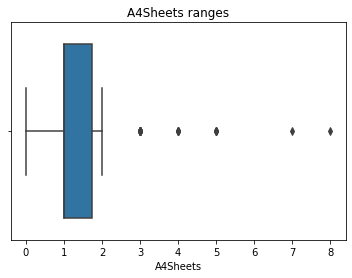

In [564]:
sliced_by_kbsize_desc_df : DataFrame = nwrlm.slice_by_kbsize(books_df = books_df, ascending = False, remove_if_zero = False)

nwcc.show_box_plot(df = sliced_by_kbsize_desc_df, x_name = "A4Sheets")


In [565]:
sliced_by_kbsize_desc_df = nwrlm.slice_by_kbsize(books_df = books_df, ascending = False, remove_if_zero = True)
sliced_by_kbsize_desc_df = nwcc.convert_index_to_one_based(df = sliced_by_kbsize_desc_df)
sliced_by_kbsize_desc_df = sliced_by_kbsize_desc_df.head(n = setting_collection.n_by_kbsize)

display(sliced_by_kbsize_desc_df)


,Title,ReadYear,Topic,Publisher,Rating,KBSize,A4Sheets
1,Machine Learning For Dummies,2017,"Data Analysis, Data Science, ML",Wiley,4,3732,8
2,Machine Learning Projects for .NET Developers,2017,"Data Analysis, Data Science, ML",Apress,4,3272,7
3,Producing Open Source Software,2016,Software Engineering,O'Reilly,1,2332,5
4,Microsoft SQL Server 2012 Integration Services,2019,"BI, Data Warehousing, PowerBI",Wiley,3,2320,5
5,Infrastructure As Code,2019,Development Tools,O'Reilly,4,2269,5
6,Microsoft Visual C# 2013 Step by Step,2016,C#,Microsoft Press,4,2179,5
7,Microservices in .NET Core,2019,C#,Manning,2,2016,5
8,Head First Design Patterns,2017,Software Engineering,O'Reilly,5,1753,4
9,Exam Ref 70-768 Developing SQL Data Models,2019,"BI, Data Warehousing, PowerBI",Pearson Education,5,1679,4
10,Algorithms An illustrated guide for programmer...,2017,Software Engineering,Manning,5,1650,4


In [566]:
sliced_by_kbsize_asc_df : DataFrame = nwrlm.slice_by_kbsize(books_df = books_df, ascending = True, remove_if_zero = True)
sliced_by_kbsize_asc_df = nwcc.convert_index_to_one_based(df = sliced_by_kbsize_asc_df)
sliced_by_kbsize_asc_df = sliced_by_kbsize_asc_df.head(n = setting_collection.n_by_kbsize)

display(sliced_by_kbsize_asc_df)


,Title,ReadYear,Topic,Publisher,Rating,KBSize,A4Sheets
1,PowerBi Succintly,2019,"BI, Data Warehousing, PowerBI",Syncfusion,1,6,1
2,"Firebug 1.5 Editing, Debugging, and Monitoring...",2016,"Data Analysis, Data Science, ML",Packt,1,8,1
3,Visual Studio 2015 Cookbook,2017,C#,Packt,2,18,1
4,Beginning Big Data with PowerBi and Excel 2013,2018,"BI, Data Warehousing, PowerBI",Apress,1,20,1
5,CSharp 5.0 In A Nutshell (5th Edition),2017,C#,O'Reilly,1,21,1
6,Dive Deep with Docker,2018,Docker,Self-Published,1,22,1
7,"Jenkins, Docker and DevOps: The Innovation Cat...",2021,Docker,Syncfusion,1,23,1
8,Why programmers work at night,2016,Software Engineering,Self-Published,1,25,1
9,LINQPad Succintly,2020,C#,Syncfusion,3,27,1
10,I Heart Logs,2023,Software Engineering,O'Reilly,1,33,1


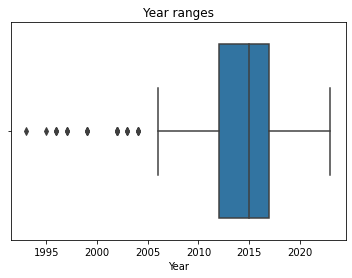

In [567]:
nwcc.show_box_plot(df = books_df, x_name = "Year")


#### Main : Markdown Files

In [568]:
nwrlm.process_readme_md(
    cumulative_df = cumulative_df, 
    setting_collection = setting_collection)


README.md

|   Years |   Books |   Pages | TotalSpend   | LastUpdate   |
|--------:|--------:|--------:|:-------------|:-------------|
|       8 |     254 |   66069 | $6758.62     | 2023-09-23   |



In [569]:
nwrlm.process_reading_list_by_month_md(
    sas_by_month_df = sas_by_month_upd_df, 
    sas_by_year_street_price_df = sas_by_year_street_price_df, 
    setting_collection = setting_collection)


READINGLISTBYMONTH.md

## Revision History

|Date|Author|Description|
|---|---|---|
|2020-12-22|numbworks|Created.|
|2023-09-23|numbworks|Last update.|

## Reading List By Month

| <sub>Month</sub>   | <sub>2016</sub>      | <sub>↕</sub>   | <sub>2017</sub>      | <sub>↕</sub>   | <sub>2018</sub>      | <sub>↕</sub>   | <sub>2019</sub>      | <sub>↕</sub>   | <sub>2020</sub>     | <sub>↕</sub>   | <sub>2021</sub>      | <sub>↕</sub>   | <sub>2022</sub>    | <sub>↕</sub>   | <sub>2023</sub>     |
|:-------------------|:---------------------|:---------------|:---------------------|:---------------|:---------------------|:---------------|:---------------------|:---------------|:--------------------|:---------------|:---------------------|:---------------|:-------------------|:---------------|:--------------------|
| <sub>1</sub>       | <sub>0 (0)</sub>     | <sub>↑</sub>   | <sub>13 (5157)</sub> | <sub>↓</sub>   | <sub>0 (0)</sub>     | <sub>↑</sub>   | <sub>4 (1061)</sub>  | <sub>↓</sub

In [570]:
nwrlm.process_reading_list_by_publisher_md(
    sas_by_publisher_flt_df = sas_by_publisher_flt_df, 
    sas_by_publisher_df = sas_by_publisher_df,
    setting_collection = setting_collection)


READINGLISTBYPUBLISHER.md

## Revision History

|Date|Author|Description|
|---|---|---|
|2020-12-22|numbworks|Created.|
|2023-09-23|numbworks|Last update.|

## Reading List By Publisher

| Publisher   |   Books |   AvgRating | IsWorth   |
|:------------|--------:|------------:|:----------|
| Syncfusion  |      38 |        2.55 | Yes       |
| Manning     |      11 |        2.91 | Yes       |
| Wiley       |       9 |        2.78 | Yes       |

| Publisher                        |   Books |   AvgRating | IsWorth   |
|:---------------------------------|--------:|------------:|:----------|
| Syncfusion                       |      38 |        2.55 | Yes       |
| O'Reilly                         |      36 |        2.17 | No        |
| Packt                            |      30 |        1.97 | No        |
| Self-Published                   |      26 |        2.31 | No        |
| Apress                           |      25 |        2.24 | No        |
| Addison-Wesley                   |     

In [571]:
nwrlm.process_reading_list_by_rating_md(
    sas_by_rating_df = sas_by_rating_df, 
    setting_collection = setting_collection)


READINGLISTBYRATING.md

## Revision History

|Date|Author|Description|
|---|---|---|
|2020-12-22|numbworks|Created.|
|2023-09-23|numbworks|Last update.|

## Reading List By Rating

| Rating   |   Books |
|:---------|--------:|
| ★★★★★    |       9 |
| ★★★★☆    |      18 |
| ★★★☆☆    |      71 |
| ★★☆☆☆    |      89 |
| ★☆☆☆☆    |      67 |



In [572]:
nwrlm.process_reading_list_by_topic_md(
    sas_by_topic_df = sas_by_topic_df, 
    setting_collection = setting_collection)


READINGLISTBYTOPIC.md

## Revision History

|Date|Author|Description|
|---|---|---|
|2020-12-22|numbworks|Created.|
|2023-09-23|numbworks|Last update.|

## Reading List By Topic

| Topic                           |   Books |   Pages |
|:--------------------------------|--------:|--------:|
| Software Engineering            |      72 |   19723 |
| C#                              |      56 |   16449 |
| Data Analysis, Data Science, ML |      32 |    8105 |
| BI, Data Warehousing, PowerBI   |      21 |    6189 |
| Python                          |      16 |    3738 |
| Development Tools               |      13 |    2942 |
| Docker                          |      12 |    1724 |
| SQL Server                      |       7 |    1955 |
| Entrepreneurship, Learning      |       6 |    1079 |
| Electronics, IoT                |       4 |     454 |
| MariaDB                         |       4 |    1177 |
| Powershell                      |       4 |    1683 |
| Cloud Vendors                   |  

In [573]:
nwrlm.process_reading_list_md(
    books_df = books_df, 
    setting_collection = setting_collection)


READINGLIST.md

## Revision History

|Date|Author|Description|
|---|---|---|
|2020-12-22|numbworks|Created.|
|2023-09-23|numbworks|Last update.|

## Reading List

| <sub>Id</sub>   | <sub>Title</sub>                                                                                           | <sub>Year</sub>   | <sub>Language</sub>   | <sub>Pages</sub>   | <sub>ReadDate</sub>   | <sub>Publisher</sub>                        | <sub>Rating</sub>   | <sub>Topic</sub>                           |
|:----------------|:-----------------------------------------------------------------------------------------------------------|:------------------|:----------------------|:-------------------|:----------------------|:--------------------------------------------|:--------------------|:-------------------------------------------|
| <sub>1</sub>    | <sub>Writing Solid Code</sub>                                                                              | <sub>1993</sub>   | <sub>EN</sub>         | <s